In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [214]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [215]:
df_base = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

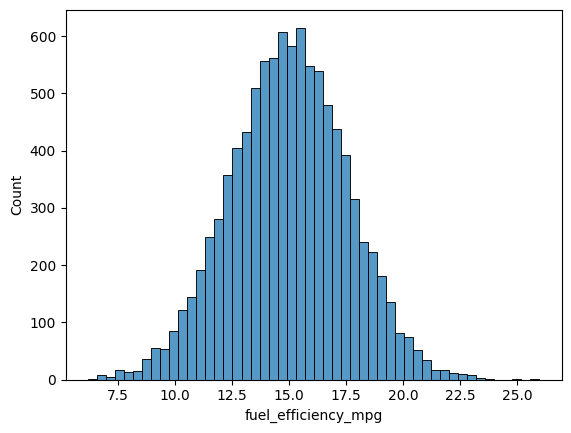

In [216]:
sns.histplot(df_base.fuel_efficiency_mpg, bins = 50)
# Has Normal Distribution

In [217]:
# Column with missing values
df_base.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [218]:
# median (50% percentile) for variable 'horsepower'

df_base['horsepower'].median()

np.float64(149.0)

In [253]:
# whihc has better rmse , fill missing values of horsepower with 0 or mean 

n = len(df_base)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [254]:
n_train , n_val, n_test

(5824, 1940, 1940)

In [255]:
idx = np.arange(n)

In [256]:
np.random.seed(42)
np.random.shuffle(idx)

In [257]:
idx[:n_train]

array([ 483, 7506, 8795, ..., 6735, 2052, 1776], shape=(5824,))

In [264]:
df_train = df_base.iloc[idx[:n_train]]
df_val = df_base.iloc[idx[n_train:n_train+n_val]]
df_test = df_base.iloc[idx[n_train+n_val:]]

In [259]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [265]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_val.reset_index(drop=True)

In [266]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [267]:
y_train = np.array(df_train.fuel_efficiency_mpg.values)
y_val = np.array(df_val.fuel_efficiency_mpg.values)
y_test = np.array(df_test.fuel_efficiency_mpg.values)

In [268]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [269]:


mean_hp = df_train['horsepower'].mean()
mean_hp

np.float64(149.54476367006487)

In [287]:


def prepare_x_zero(df):
    df = df.copy()
    df['horsepower'] = df['horsepower'].fillna(0)
    X = df.values
    return X

In [288]:
def prepare_x_mean(df, mean_hp):
    df = df.copy()
    df['horsepower'] = df['horsepower'].fillna(mean_hp) 
    X = df.values
    return X

In [289]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [290]:
def rmse(y_val, y_pred):
    se= (y_val-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)
    

In [275]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


In [291]:
x_train = prepare_x_zero(df_train)

In [292]:
w0, w= train_linear_regression(x_train, y_train)

In [293]:
x_val = prepare_x_zero(df_val)

In [294]:
y_pred = w0 + x_val.dot(w)

In [295]:
rmse_case1_zero = round(rmse(y_val,y_pred),2)
rmse_case1_zero

np.float64(0.52)

In [296]:
x_train = prepare_x_mean(df_train, mean_hp)

In [297]:
w0, w= train_linear_regression(x_train, y_train)

In [298]:
x_val = prepare_x_mean(df_val , mean_hp)

In [299]:
y_pred = w0 + x_val.dot(w)

In [300]:
rmse_case2_mean = round(rmse(y_val,y_pred),2)
rmse_case2_mean

np.float64(0.46)

In [303]:
# Regularized Linear regression

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [315]:
# 0.01 is the best RMSE

x_train = prepare_x_zero(df_train)
x_val = prepare_x_zero(df_val)
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(x_train, y_train, r)
    y_pred = w0 + x_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    print(r, score)
    
   
      

0 0.52
0.01 0.52
0.1 0.52
1 0.52
5 0.53
10 0.53
100 0.53


In [320]:
# Seed selection influence on score

scores = []
for n in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(n)
    np.random.shuffle(idx)
    df_train = df_base.iloc[idx[:n_train]]
    df_val = df_base.iloc[idx[n_train:n_train+n_val]]
    df_test = df_base.iloc[idx[n_train+n_val:]]

    y_train = np.array(df_train.fuel_efficiency_mpg.values)
    y_val = np.array(df_val.fuel_efficiency_mpg.values)
    y_test = np.array(df_test.fuel_efficiency_mpg.values)

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    x_train = prepare_x_zero(df_train)
    x_val = prepare_x_zero(df_val)
    w0, w= train_linear_regression(x_train, y_train)
    y_pred = w0 + x_val.dot(w)
    scores.append(rmse(y_val, y_pred))

    

In [306]:
scores

[np.float64(0.5155264762416023),
 np.float64(0.515825297896196),
 np.float64(0.5128324892961215),
 np.float64(0.5084930311163809),
 np.float64(0.5094209022094792),
 np.float64(0.5301284975741177),
 np.float64(0.5142267107598534),
 np.float64(0.5124852802269689),
 np.float64(0.5082885728759076),
 np.float64(0.5053325213822996)]

In [311]:
scores = np.array(scores)

In [321]:
round(np.std(scores), 3)

np.float64(0.007)

In [319]:
# Combine train and Validation data set and train the model

np.random.seed(9)
np.random.shuffle(idx)
df_train = df_base.iloc[idx[:n_train]]
df_val = df_base.iloc[idx[n_train:n_train+n_val]]
df_test = df_base.iloc[idx[n_train+n_val:]]

df_full_train = pd.concat([df_train, df_val])


df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.array(df_full_train.fuel_efficiency_mpg.values)
y_test = np.array(df_test.fuel_efficiency_mpg.values)

del df_full_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

x_train = prepare_x_zero(df_full_train)
x_test = prepare_x_zero(df_test)

w0, w = train_linear_regression_reg(x_train, y_train, 0.001)
y_pred = w0 + x_test.dot(w)
print(round(rmse(y_test, y_pred), 3))

0.517
